In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [469]:
# Average number of games a player misses in their career
ft['percentage of games missed'].mean()

18.317344213649676

In [3]:
# Read in merged table
ft = pd.read_csv('finaltable.csv')

In [524]:
ft.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,1998-1999,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,1999-2000,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,2000-2001,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,1998-1999,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,1999-2000,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [525]:
# Get the count of each weight value
value_counts = ft['weight'].value_counts()

# Select the values where the count is less than or equal to 12
to_remove = value_counts[value_counts <= 12].index

# Keep rows where the weight column is not in to_remove
ft = ft[~ft.weight.isin(to_remove)]

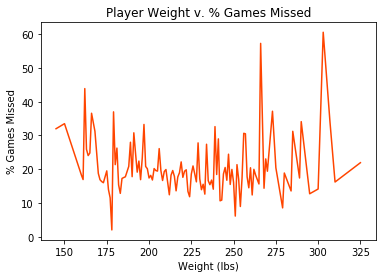

<Figure size 720x720 with 0 Axes>

In [118]:
# Group together weight and % of games missed. Group by weight. Find mean of % of games missed for each weight.

ftgroup = ft[['percentage of games missed','weight']]
ftgroup1 = ftgroup.groupby('weight')
ftgroup2 = ftgroup1.mean()

# Plot line graph and save as png

plt.plot(ftgroup1.mean(), color='orangered')
plt.title('Player Weight v. % Games Missed', fontsize=12)
plt.ylabel('% Games Missed')
plt.xlabel('Weight (lbs)')
plt.savefig('./fig1.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

In [90]:
# Get the count of each height value
value_counts = ft['height'].value_counts()

# Select the values where the count is less than or equal to 10
to_remove = value_counts[value_counts <= 10].index

# Keep rows where the height column is not in to_remove
ft = ft[~ft.height.isin(to_remove)]

In [91]:
# Group together height and % of games missed. Group by height. Find mean of % of games missed for each height.
gmht = ft[['percentage of games missed','height']]
gmhtgroup = gmht.groupby('height')
gmhtgroup2 = gmhtgroup.mean()

In [93]:
gmhtgroup2.head()

,percentage of games missed
height,
5-10,20.538462
5-11,19.382979
5-9,19.864706
6-0,19.643158
6-1,18.792923


In [94]:
#Reset Index. Reindex so heights are in ascending order. Reset index again. Drop extra index column. 

gmhtgroup2 = gmhtgroup2.reset_index() 

gmhtgroup2 = gmhtgroup2.reindex([2,0,1,3,4,7,8,9,10,11,12,13,14,5,6,15,16,17,18,19])

gmhtgroup2 = gmhtgroup2.reset_index() 

gmhtgroup2.drop(labels=['index'], axis="columns", inplace=True)

In [95]:
# Updated table
gmhtgroup2.head()

,height,percentage of games missed
0,5-9,19.864706
1,5-10,20.538462
2,5-11,19.382979
3,6-0,19.643158
4,6-1,18.792923


<Figure size 720x720 with 0 Axes>

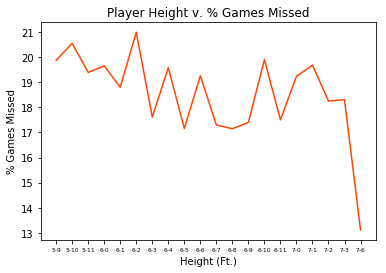

<Figure size 720x720 with 0 Axes>

In [119]:
# Plot line graph and save as PNG.

plt.plot(list(gmhtgroup2.height), gmhtgroup2['percentage of games missed'], color="orangered")
plt.title('Player Height v. % Games Missed', fontsize=12)
plt.ylabel('% Games Missed')
plt.xlabel('Height (Ft.)')
plt.xticks(fontsize=6)
plt.savefig('./fig2.png', dpi=300)
plt.figure(figsize=(10,10))

In [100]:
# Get the count of each value
value_counts = ft['minutes_per_game'].value_counts()

# Select the values where the count is less or equal to 2
to_remove = value_counts[value_counts <= 2].index

# Keep rows where the minutes per game column is not in to_remove
ft = ft[~ft.minutes_per_game.isin(to_remove)]

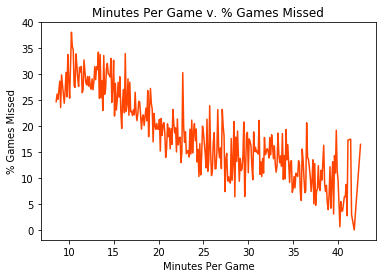

<Figure size 720x720 with 0 Axes>

In [120]:
# Group together minute per game and % of games missed. 
# Group by minutes per game. Find mean of % of games missed for each minutes per game.

gmmin = ft[['percentage of games missed','minutes_per_game']]
gmmingroup = gmmin.groupby('minutes_per_game')
gmmingroupmean = gmmingroup.mean()

# Line graph and save as PNG

plt.plot(gmmingroup.mean(), color ="orangered")
plt.title('Minutes Per Game v. % Games Missed', fontsize=12)
plt.ylabel('% Games Missed')
plt.xlabel('Minutes Per Game')
plt.savefig('./fig3.png', dpi=300)
plt.figure(figsize=(10,10))

plt.show()

In [103]:
# Create dictionary of abbreviated years/seasons

seasonabv = ['98-99','99-00', '00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
             '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16','16-17', '17-18']

# Replace old years/seasons with new abbreviated years/seasons

ftsnrp = ft.replace({'season': {'1998-1999': '98-99', '1999-2000': '99-00', '2000-2001': '00-01',
                                '2001-2002': '01-02', '2002-2003': '02-03', '2003-2004': '03-04',
                                '2004-2005': '04-05', '2005-2006': '05-06', '2006-2007': '06-07',
                                '2007-2008': '07-08', '2008-2009': '08-09', '2009-2010': '09-10',
                                '2010-2011': '10-11', '2011-2012': '11-12',
                                '2012-2013': '12-13', '2013-2014': '13-14', '2014-2015': '14-15',
                                '2015-2016': '15-16', '2016-2017': '16-17', '2017-2018':'17-18'}})

ftsnrp.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,98-99,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,99-00,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,98-99,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,99-00,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [104]:
#Calculate Games Missed, add it as a new colomn

ftsnrp['games missed']=ftsnrp['Number of Games']-ftsnrp['games_played']

In [105]:
# Reorder columns

df = ftsnrp[['season', 'Number of Games', 'player', 'team', 'height', 'weight', 'games_played', 'games missed',
                 'percentage of games missed', 'minutes_per_game']]

In [108]:
# Export to CSV

df.to_csv('Final_Dataframe_Without_Salary.csv', index=True)

In [109]:
# Group percentage of games missed and season by season
# Find mean of percentage of games missed

gmsn = ftsnrp[['percentage of games missed','season']]
gmsngroup = gmsn.groupby('season')
sortlist = gmsngroup.mean() 

In [110]:
# Reset index

sortlist1= sortlist.reset_index()

In [111]:
# Reindex order of years. Reset index again. 

sortlist3 = sortlist1.reindex([18, 19, 0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17])
sortlist4 = sortlist3.reset_index()
sortlist4.head()

,index,season,percentage of games missed
0,18,98-99,14.712934
1,19,99-00,16.544654
2,0,00-01,17.542769
3,1,01-02,18.126498
4,2,02-03,16.394620


In [112]:
# Drop extra index column

sortlist4.drop(labels=['index'], axis='columns', inplace=True)

In [113]:
# Export updated dataframe to CSV

sortlist4.to_csv("gmsn.csv", index=False)

In [114]:
# Import games missed per season file

gmsn = pd.read_csv('gmsn.csv')
gmsn.head()

,season,percentage of games missed
0,98-99,14.712934
1,99-00,16.544654
2,00-01,17.542769
3,01-02,18.126498
4,02-03,16.394620


In [115]:
# Reset index to season

gmsn1 = gmsn.set_index('season')

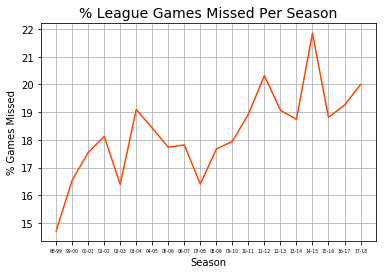

<Figure size 720x720 with 0 Axes>

In [123]:
# Line graph percentage of games missed per season

plt.plot(gmsn1, color="orangered")
plt.title('% League Games Missed Per Season', fontsize=14)
plt.ylabel('% Games Missed')
plt.xlabel('Season')
plt.grid()
plt.xticks(fontsize=4.5)
plt.savefig('./fig5.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

In [127]:
# Export table with updated season a breviations

ftsnrp.to_csv("finaltable_update1.csv", index=False)

In [167]:
ftsnrp.head()

,season,player,team,games_played,minutes_per_game,Number of Games,percentage of games missed,height,weight
0,98-99,A.C. Green,DAL,50,18.5,50,0.0,6-9,220
1,99-00,A.C. Green,LAL,82,23.5,82,0.0,6-9,220
2,00-01,A.C. Green,MIA,82,17.2,82,0.0,6-9,220
3,98-99,Aaron McKie,PHI,50,19.2,50,0.0,6-5,209
4,99-00,Aaron McKie,PHI,82,23.8,82,0.0,6-5,209


In [16]:
# Import player salary per season table
ps = pd.read_csv('playersalary.csv')
ps.head()

,player,player_salary,season
0,Kevin Garnett,"$25,200,000",2002/03
1,Shaquille O'Neal,"$23,571,429",2002/03
2,Alonzo Mourning,"$20,629,800",2002/03
3,Juwan Howard,"$20,625,000",2002/03
4,Scottie Pippen,"$19,727,524",2002/03


In [17]:
# Replace old years/seasons with new abbreviated years/seasons in this table as well so both tables match up

ps = ps.replace({'season': {'2000/01': '00-01',
                                '2001/02': '01-02', '2002/03': '02-03', '2003/04': '03-04',
                                '2004/05': '04-05', '2005/06': '05-06', '2006/07': '06-07',
                                '2007/08': '07-08', '2008/09': '08-09', '2009/10': '09-10',
                                '2010/11': '10-11', '2011/12': '11-12',
                                '2012/13': '12-13', '2013/14': '13-14', '2014/15': '14-15',
                                '2015/16': '15-16', '2016/17': '16-17', '2017/18':'17-18'}})

In [18]:
ps.head()

,player,player_salary,season
0,Kevin Garnett,"$25,200,000",02-03
1,Shaquille O'Neal,"$23,571,429",02-03
2,Alonzo Mourning,"$20,629,800",02-03
3,Juwan Howard,"$20,625,000",02-03
4,Scottie Pippen,"$19,727,524",02-03


In [22]:
# Merge player df and salary df

merged_df = pd.merge(ps, df, on=('season', 'player'))
merged_df.head()

,player,player_salary,season,Number of Games,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
0,Kevin Garnett,"$25,200,000",02-03,82,MIN,6-11,240,82,0,0.0,40.5
1,Shaquille O'Neal,"$23,571,429",02-03,82,LAL,7-1,325,67,15,18.3,37.8
2,Juwan Howard,"$20,625,000",02-03,82,DEN,6-9,240,77,5,6.1,35.4
3,Scottie Pippen,"$19,727,524",02-03,82,POR,6-8,210,64,18,22.0,29.9
4,Karl Malone,"$19,250,000",02-03,82,UTA,6-9,250,81,1,1.2,36.2


In [25]:
# Re-order columns

finaldf = merged_df[['season', 'Number of Games', 'player', 'player_salary', 'team', 'height', 'weight',
                     'games_played', 'games missed', 'percentage of games missed', 'minutes_per_game']]
finaldf.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
0,02-03,82,Kevin Garnett,"$25,200,000",MIN,6-11,240,82,0,0.0,40.5
1,02-03,82,Shaquille O'Neal,"$23,571,429",LAL,7-1,325,67,15,18.3,37.8
2,02-03,82,Juwan Howard,"$20,625,000",DEN,6-9,240,77,5,6.1,35.4
3,02-03,82,Scottie Pippen,"$19,727,524",POR,6-8,210,64,18,22.0,29.9
4,02-03,82,Karl Malone,"$19,250,000",UTA,6-9,250,81,1,1.2,36.2


In [44]:
# Sort by season ascending

df_salary = finaldf.sort_values(by='season', ascending=True)
df_salary.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
1573,00-01,82,Mike Penberthy,"$316,969",LAL,6-3,185,53,29,35.4,16.1
1405,00-01,82,Matt Bullard,"$2,100,000",HOU,6-10,215,61,21,25.6,16.4
1404,00-01,82,Vinny Del Negro,"$2,100,000",PHX,6-4,185,65,17,20.7,14.2
1403,00-01,82,Billy Owens,"$2,100,000",DET,6-8,220,45,37,45.1,17.6
1402,00-01,82,Hubert Davis,"$2,100,000",WAS,6-5,183,66,16,19.5,25.6


In [46]:
# Reset index and drop old index column

df_salary = df_salary.reset_index()
df_salary.drop(labels=['level_0'], axis='columns', inplace=True)

In [47]:
# Remove $ from salary column

df_salary['player_salary'] = list(map(lambda x: x.strip('\$'), df_salary['player_salary']))
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
0,1573,00-01,82,Mike Penberthy,"316,969",LAL,6-3,185,53,29,35.4,16.1
1,1405,00-01,82,Matt Bullard,"2,100,000",HOU,6-10,215,61,21,25.6,16.4
2,1404,00-01,82,Vinny Del Negro,"2,100,000",PHX,6-4,185,65,17,20.7,14.2
3,1403,00-01,82,Billy Owens,"2,100,000",DET,6-8,220,45,37,45.1,17.6
4,1402,00-01,82,Hubert Davis,"2,100,000",WAS,6-5,183,66,16,19.5,25.6


In [48]:
# Remove , from salary column
df_salary['player_salary'] = df_salary['player_salary'].str.replace(',', '')
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
0,1573,00-01,82,Mike Penberthy,316969,LAL,6-3,185,53,29,35.4,16.1
1,1405,00-01,82,Matt Bullard,2100000,HOU,6-10,215,61,21,25.6,16.4
2,1404,00-01,82,Vinny Del Negro,2100000,PHX,6-4,185,65,17,20.7,14.2
3,1403,00-01,82,Billy Owens,2100000,DET,6-8,220,45,37,45.1,17.6
4,1402,00-01,82,Hubert Davis,2100000,WAS,6-5,183,66,16,19.5,25.6


In [49]:
# Change salary column to int
df_salary['player_salary'] = df_salary['player_salary'].astype('int64')

In [50]:
# Add salary per game column

df_salary['salary per game'] = df_salary['player_salary']/df_salary['Number of Games']
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game
0,1573,00-01,82,Mike Penberthy,316969,LAL,6-3,185,53,29,35.4,16.1,3865.475610
1,1405,00-01,82,Matt Bullard,2100000,HOU,6-10,215,61,21,25.6,16.4,25609.756098
2,1404,00-01,82,Vinny Del Negro,2100000,PHX,6-4,185,65,17,20.7,14.2,25609.756098
3,1403,00-01,82,Billy Owens,2100000,DET,6-8,220,45,37,45.1,17.6,25609.756098
4,1402,00-01,82,Hubert Davis,2100000,WAS,6-5,183,66,16,19.5,25.6,25609.756098


In [51]:
# Convert player salary to millions. 2.1 = 2.1 million

df_salary['player_salary']=df_salary['player_salary']/1000000
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game
0,1573,00-01,82,Mike Penberthy,0.316969,LAL,6-3,185,53,29,35.4,16.1,3865.475610
1,1405,00-01,82,Matt Bullard,2.100000,HOU,6-10,215,61,21,25.6,16.4,25609.756098
2,1404,00-01,82,Vinny Del Negro,2.100000,PHX,6-4,185,65,17,20.7,14.2,25609.756098
3,1403,00-01,82,Billy Owens,2.100000,DET,6-8,220,45,37,45.1,17.6,25609.756098
4,1402,00-01,82,Hubert Davis,2.100000,WAS,6-5,183,66,16,19.5,25.6,25609.756098


In [52]:
# Convert salary per game to millions. .0256 = 25.6k

df_salary['salary per game']=df_salary['salary per game']/1000000
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game
0,1573,00-01,82,Mike Penberthy,0.316969,LAL,6-3,185,53,29,35.4,16.1,0.003865
1,1405,00-01,82,Matt Bullard,2.100000,HOU,6-10,215,61,21,25.6,16.4,0.025610
2,1404,00-01,82,Vinny Del Negro,2.100000,PHX,6-4,185,65,17,20.7,14.2,0.025610
3,1403,00-01,82,Billy Owens,2.100000,DET,6-8,220,45,37,45.1,17.6,0.025610
4,1402,00-01,82,Hubert Davis,2.100000,WAS,6-5,183,66,16,19.5,25.6,0.025610


In [53]:
# Round salary per game to 4 decimals
df_salary['salary per game']=df_salary['salary per game'].round(3)
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game
0,1573,00-01,82,Mike Penberthy,0.316969,LAL,6-3,185,53,29,35.4,16.1,0.004
1,1405,00-01,82,Matt Bullard,2.100000,HOU,6-10,215,61,21,25.6,16.4,0.026
2,1404,00-01,82,Vinny Del Negro,2.100000,PHX,6-4,185,65,17,20.7,14.2,0.026
3,1403,00-01,82,Billy Owens,2.100000,DET,6-8,220,45,37,45.1,17.6,0.026
4,1402,00-01,82,Hubert Davis,2.100000,WAS,6-5,183,66,16,19.5,25.6,0.026


In [54]:
# Round player salary to 2 decimals
df_salary['player_salary']=df_salary['player_salary'].round(2)
df_salary.head()

,index,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game
0,1573,00-01,82,Mike Penberthy,0.32,LAL,6-3,185,53,29,35.4,16.1,0.004
1,1405,00-01,82,Matt Bullard,2.10,HOU,6-10,215,61,21,25.6,16.4,0.026
2,1404,00-01,82,Vinny Del Negro,2.10,PHX,6-4,185,65,17,20.7,14.2,0.026
3,1403,00-01,82,Billy Owens,2.10,DET,6-8,220,45,37,45.1,17.6,0.026
4,1402,00-01,82,Hubert Davis,2.10,WAS,6-5,183,66,16,19.5,25.6,0.026


In [55]:
# Create Salary Bin column
bins = [0, 5, 10, 15, 20, 25, 30, 35]
df_salary['salarybin'] = pd.cut(df_salary['player_salary'], bins = bins, labels = ['<$5mm', '$5-10mm', '$10-15mm',
                                                                                   '$15-20mm', '$20-25mm', '$25-30mm',
                                                                                   '$30-35mm'])

In [58]:
# Drop extra index column ... again

df_salary.drop(labels=['index'], axis='columns', inplace=True)

In [59]:
df_salary.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game,salarybin
0,00-01,82,Mike Penberthy,0.32,LAL,6-3,185,53,29,35.4,16.1,0.004,<$5mm
1,00-01,82,Matt Bullard,2.10,HOU,6-10,215,61,21,25.6,16.4,0.026,<$5mm
2,00-01,82,Vinny Del Negro,2.10,PHX,6-4,185,65,17,20.7,14.2,0.026,<$5mm
3,00-01,82,Billy Owens,2.10,DET,6-8,220,45,37,45.1,17.6,0.026,<$5mm
4,00-01,82,Hubert Davis,2.10,WAS,6-5,183,66,16,19.5,25.6,0.026,<$5mm


In [62]:
# How many players in each salary bucket

df_salary['salarybin'].value_counts()

<$5mm       3683
$5-10mm     1161
$10-15mm     611
$15-20mm     251
$20-25mm      91
$25-30mm      20
$30-35mm       4
Name: salarybin, dtype: int64

In [56]:
# Create new table with salary bin and % games missed

ps_bins = df_salary[['percentage of games missed','salarybin']]
ps_bins2 = ps_bins.groupby('salarybin')
ps_bins3 = ps_bins2.mean()
ps_bins3 = ps_bins3.reset_index()
ps_bins3

,salarybin,percentage of games missed
0,<$5mm,19.345235
1,$5-10mm,17.376486
2,$10-15mm,16.833715
3,$15-20mm,16.631474
4,$20-25mm,18.181319
5,$25-30mm,8.905000
6,$30-35mm,25.325000


In [63]:
# Swap Columns

ps_bins3 = ps_bins3[['percentage of games missed','salarybin']]
ps_bins3

,percentage of games missed,salarybin
0,19.345235,<$5mm
1,17.376486,$5-10mm
2,16.833715,$10-15mm
3,16.631474,$15-20mm
4,18.181319,$20-25mm
5,8.905000,$25-30mm
6,25.325000,$30-35mm


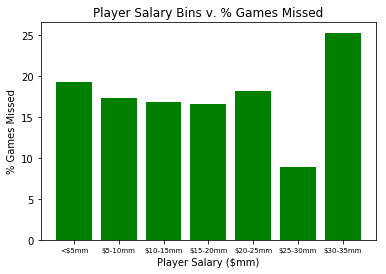

<Figure size 720x2160 with 0 Axes>

In [126]:
# Create bar graph

plt.bar(list(ps_bins3.salarybin),ps_bins3['percentage of games missed'], color='green')
plt.title('Player Salary Bins v. % Games Missed', fontsize=12)
plt.ylabel('% Games Missed')
plt.xlabel('Player Salary ($mm)')
plt.xticks(fontsize=7)
plt.savefig('./fig6.png', dpi=300)
plt.figure(figsize=(10,30))

plt.show()

In [66]:
# Replace defunct franchises with new franchise names

df_salary['team'] = df_salary['team'].replace({'NJN': 'BRK', 'SEA': 'OKC', 'VAN': 'MEM'})
df_salary.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game,salarybin
0,00-01,82,Mike Penberthy,0.32,LAL,6-3,185,53,29,35.4,16.1,0.004,<$5mm
1,00-01,82,Matt Bullard,2.10,HOU,6-10,215,61,21,25.6,16.4,0.026,<$5mm
2,00-01,82,Vinny Del Negro,2.10,PHX,6-4,185,65,17,20.7,14.2,0.026,<$5mm
3,00-01,82,Billy Owens,2.10,DET,6-8,220,45,37,45.1,17.6,0.026,<$5mm
4,00-01,82,Hubert Davis,2.10,WAS,6-5,183,66,16,19.5,25.6,0.026,<$5mm


In [69]:
# Add salary lost to games missed column

df_salary['salary lost to games missed'] = df_salary['games missed']*df_salary['salary per game']
df_salary.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game,salarybin,salary lost to games missed
0,00-01,82,Mike Penberthy,0.32,LAL,6-3,185,53,29,35.4,16.1,0.004,<$5mm,0.116
1,00-01,82,Matt Bullard,2.10,HOU,6-10,215,61,21,25.6,16.4,0.026,<$5mm,0.546
2,00-01,82,Vinny Del Negro,2.10,PHX,6-4,185,65,17,20.7,14.2,0.026,<$5mm,0.442
3,00-01,82,Billy Owens,2.10,DET,6-8,220,45,37,45.1,17.6,0.026,<$5mm,0.962
4,00-01,82,Hubert Davis,2.10,WAS,6-5,183,66,16,19.5,25.6,0.026,<$5mm,0.416


In [70]:
# Round salary lost to games missed column to 2 decimals
df_salary['salary lost to games missed'] = df_salary['salary lost to games missed'].round(2)
df_salary.head()

,season,Number of Games,player,player_salary,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game,salary per game,salarybin,salary lost to games missed
0,00-01,82,Mike Penberthy,0.32,LAL,6-3,185,53,29,35.4,16.1,0.004,<$5mm,0.12
1,00-01,82,Matt Bullard,2.10,HOU,6-10,215,61,21,25.6,16.4,0.026,<$5mm,0.55
2,00-01,82,Vinny Del Negro,2.10,PHX,6-4,185,65,17,20.7,14.2,0.026,<$5mm,0.44
3,00-01,82,Billy Owens,2.10,DET,6-8,220,45,37,45.1,17.6,0.026,<$5mm,0.96
4,00-01,82,Hubert Davis,2.10,WAS,6-5,183,66,16,19.5,25.6,0.026,<$5mm,0.42


In [71]:
# Re-order columns ... again

df_salary = df_salary[['season', 'Number of Games', 'player', 'player_salary', 'salary per game', 'salarybin',
                       'salary lost to games missed', 'team', 'height', 'weight', 'games_played', 'games missed',
                       'percentage of games missed', 'minutes_per_game']]
df_salary.head()

,season,Number of Games,player,player_salary,salary per game,salarybin,salary lost to games missed,team,height,weight,games_played,games missed,percentage of games missed,minutes_per_game
0,00-01,82,Mike Penberthy,0.32,0.004,<$5mm,0.12,LAL,6-3,185,53,29,35.4,16.1
1,00-01,82,Matt Bullard,2.10,0.026,<$5mm,0.55,HOU,6-10,215,61,21,25.6,16.4
2,00-01,82,Vinny Del Negro,2.10,0.026,<$5mm,0.44,PHX,6-4,185,65,17,20.7,14.2
3,00-01,82,Billy Owens,2.10,0.026,<$5mm,0.96,DET,6-8,220,45,37,45.1,17.6
4,00-01,82,Hubert Davis,2.10,0.026,<$5mm,0.42,WAS,6-5,183,66,16,19.5,25.6


In [128]:
df_salary['height'].value_counts()

6-9     741
6-7     614
6-8     602
6-10    537
6-11    513
6-6     504
6-3     465
6-5     354
7-0     344
6-4     304
6-1     257
6-2     213
6-0     129
7-1      95
5-11     38
7-2      32
5-10     22
7-3      19
5-9      17
7-6      12
5-5       9
Name: height, dtype: int64

In [72]:
# Save to CSV

df_salary.to_csv('Final_Dataframe_With_Salary.csv', index=True)

In [77]:
# Group by team, salary dollars lost to missed games and games missed

fts1 = df_salary[['team', 'salary lost to games missed', 'games missed']]
fts2 = fts1.groupby('team')
fts3 = fts2.sum() 
fts3 = fts3.sort_values(by='games missed')
fts3.head()

,salary lost to games missed,games missed
team,,
OKC,135.05,2239
PHX,144.50,2252
SAS,165.05,2359
DET,156.65,2419
POR,158.95,2434


In [81]:
fts3 = fts3.reset_index()
fts3.head()

,team,salary lost to games missed,games missed
0,OKC,135.05,2239
1,PHX,144.50,2252
2,SAS,165.05,2359
3,DET,156.65,2419
4,POR,158.95,2434


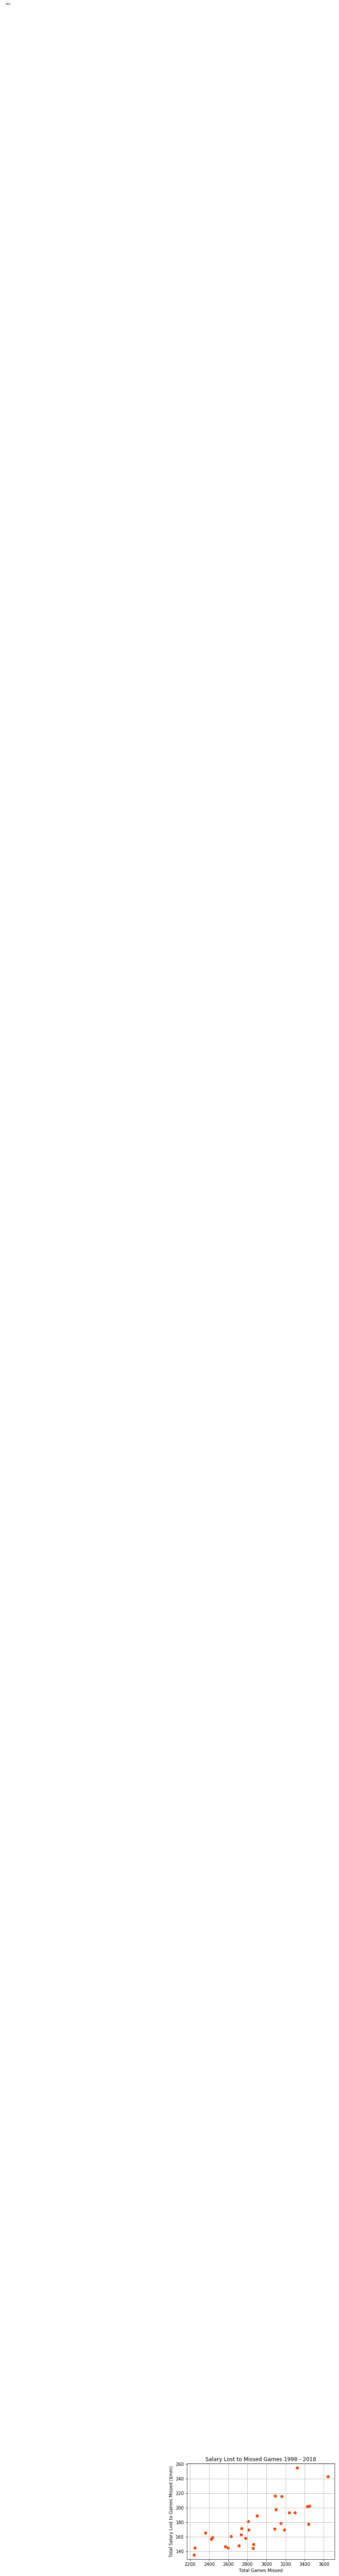

<Figure size 720x720 with 0 Axes>

In [130]:
# Scatter plot of games missed v. salary lost to games missed, by team. My favourite graph. Add team logos.

plt.scatter(fts3['games missed'], fts3['salary lost to games missed'], color = 'orangered' )

plt.grid()


plt.text(x, y, text, fontsize=6)
plt.title('Salary Lost to Missed Games 1998 - 2018', fontsize=12)
plt.xlabel('Total Games Missed')
plt.ylabel('Total Salary Lost to Games Missed ($mm)')
    
    
    
plt.savefig('./fig7.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()

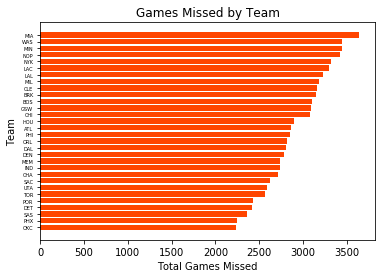

<Figure size 720x720 with 0 Axes>

In [211]:
# graph total games missed by team

gmtm = fts[['number of games missed','team']]
gmtmgroup = gmtm.groupby('team')
gmtmgroupmean = gmtmgroup.sum()
gmtmgroupmean = gmtmgroupmean.reset_index().sort_values('number of games missed', ascending=True)

plt.barh(gmtmgroupmean['team'], gmtmgroupmean['number of games missed'], color='Orangered')
plt.title('Games Missed by Team', fontsize=12)
plt.ylabel('Team')
plt.xlabel('Total Games Missed')
plt.xticks(fontsize=10)
plt.yticks(fontsize=5)
plt.savefig('./fig4.png', dpi=300)
plt.figure(figsize=(10,10))


plt.show()